In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# Is df data frame?
df_wine=pd.read_csv("wine.csv")
feat_labels=df_wine.columns[2:]
df_wine.head()

,Unnamed: 0,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
import os
os.getcwd()

'/Users/hidehiro/code/hidehiro98/ml_raschka_sugakubunka'

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 2:].values, df_wine.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

forest=RandomForestClassifier(n_estimators=10000)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.186015
 2) Proline                        0.154922
 3) Flavanoids                     0.145395
 4) Alcohol                        0.138589
 5) OD280/OD315 of diluted wines   0.114604
 6) Hue                            0.066164
 7) Total phenols                  0.061988
 8) Alcalinity of ash              0.038511
 9) Malic acid                     0.026884
10) Magnesium                      0.026042
11) Proanthocyanins                0.015905
12) Ash                            0.012699
13) Nonflavanoid phenols           0.012284


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3dbd30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110823898>]], dtype=object)

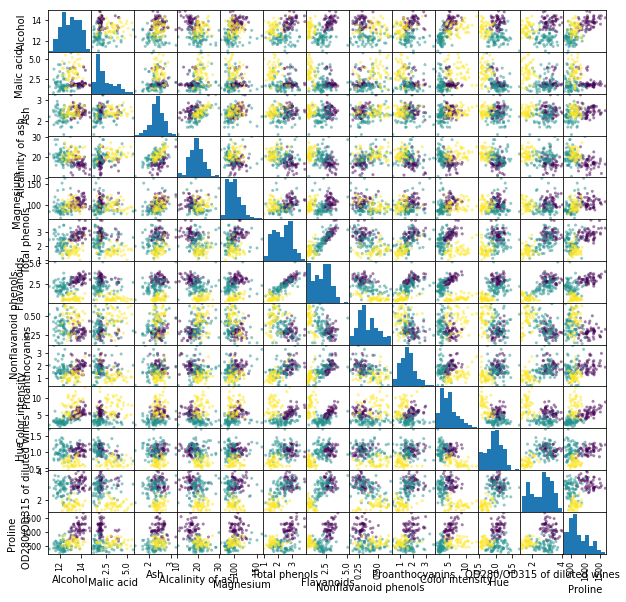

In [4]:
%matplotlib inline
wine_dataframe = pd.DataFrame(X, columns = df_wine.columns[2:])
pd.plotting.scatter_matrix(wine_dataframe, c=y, figsize = (10, 10))

In [6]:
df_wine.iloc[:,1].values

df_wine.iloc[10:20, 3:5]

,Malic acid,Ash
10,2.16,2.30
11,1.48,2.32
12,1.73,2.41
13,1.73,2.39
14,1.87,2.38
15,1.81,2.70
16,1.92,2.72
17,1.57,2.62
18,1.59,2.48
19,3.10,2.56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110871550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111b00a90>]], dtype=object)

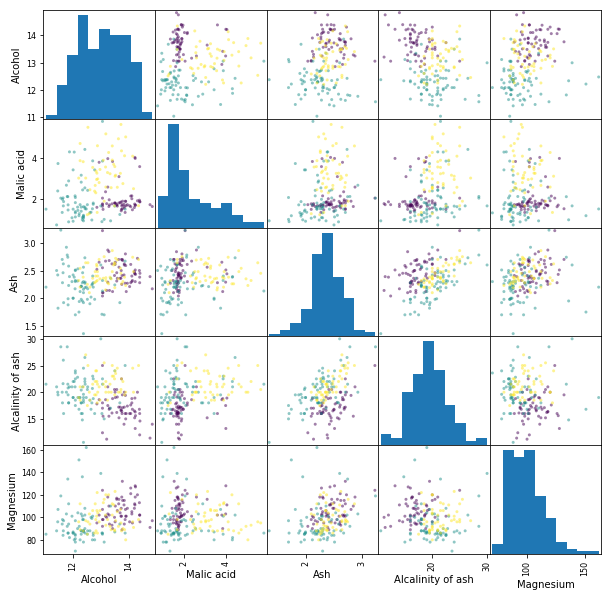

In [8]:
%matplotlib inline
y = df_wine.iloc[:,1].values
pd.plotting.scatter_matrix(df_wine.iloc[:,2:7],c=y, figsize=(10,10))

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [10]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                                           n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                                train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                                 test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, "o-", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

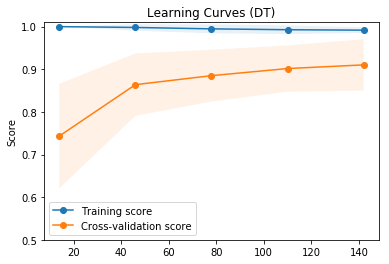

In [16]:
title = "Learning Curves (DT)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=3)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)

In [12]:
indices

array([ 9, 12,  6,  0, 11, 10,  5,  3,  1,  4,  8,  2,  7])

<module 'matplotlib.pyplot' from '/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

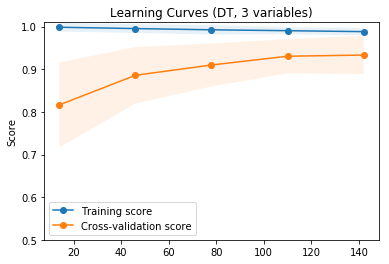

In [17]:
X_selected, y_selected = X[:, indices[:3]], y
title = "Learning Curves (DT, 3 variables)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=3)
plot_learning_curve(estimator, title, X_selected, y_selected, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)

<module 'matplotlib.pyplot' from '/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

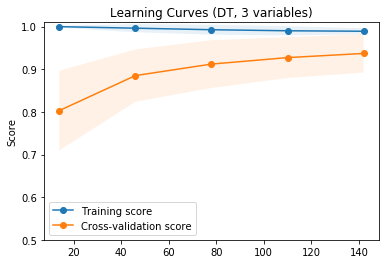

In [28]:
X_selected, y_selected = X[:, indices[:4]], y
title = "Learning Curves (DT, 3 variables)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=3)
plot_learning_curve(estimator, title, X_selected, y_selected, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)

(-2.7906878531550157,
 2.0729008123467936,
 -2.1591907201254932,
 2.2005801352118994)

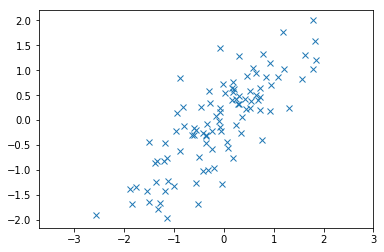

In [31]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
mean = [0,0]
cov = [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, "x")
plt.axis("equal")


[ 0.90176641  0.09823359]


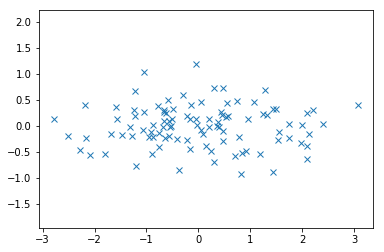

In [33]:
X=np.array([x, y]).transpose()
pca=PCA(n_components=2) # もともとの変数の数以下
pca.fit(X)
X_r = pca.transform(X)
plt.plot(X_r[:, 0], X_r[:,1], "x")
plt.axis("equal")
print(pca.explained_variance_ratio_)

explained variance ration (first two components): [ 0.92461621  0.05301557]


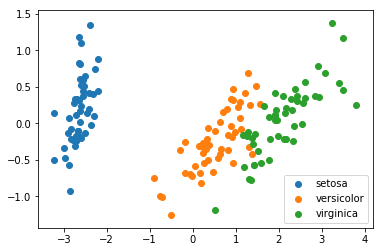

In [35]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

iris=datasets.load_iris()
X, y, target_names=iris.data, iris.target, iris.target_names
pca=PCA(n_components=2)
pca.fit(X)
X_r=pca.transform(X)

print("explained variance ration (first two components): %s" % str(pca.explained_variance_ratio_))
plt.figure()
for i in range(len(target_names)):
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], label=target_names[i])
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11296f0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112e03320>]], dtype=object)

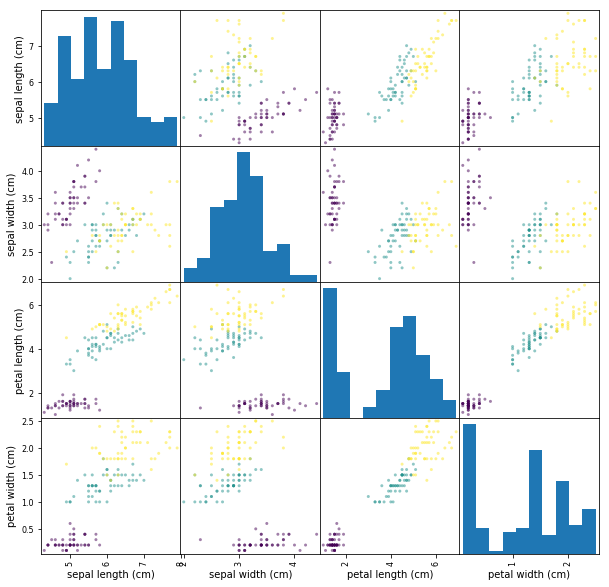

In [39]:
%matplotlib inline
iris_dataframe = pd.DataFrame(X, columns = iris.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c = y, figsize = (10, 10))

<module 'matplotlib.pyplot' from '/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

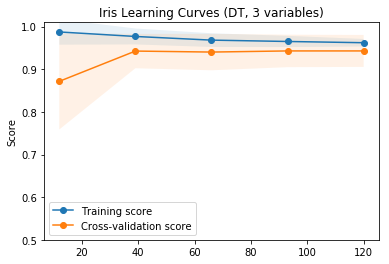

In [45]:
# まずirisを普通にDTで分類してみる
title = "Iris Learning Curves (DT, 3 variables)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=2)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)

<module 'matplotlib.pyplot' from '/Users/hidehiro/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

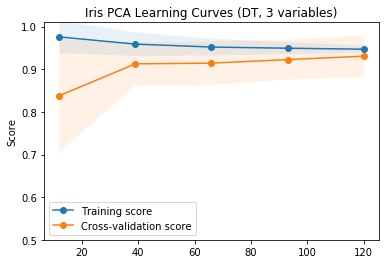

In [44]:
# PCAした後のデータでやってみる。irisの場合はもともと分類できてしまっているので対して変わらない
title = "Iris PCA Learning Curves (DT, 3 variables)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=2)
plot_learning_curve(estimator, title, X_r, y, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)